### Reinforcement Learning - Resource Manager

Version 1.8:

- Changes to Environment
    - Add second Resource: Food
    - Use same Logic, see if the agent balances
        - Fun fact - he didn't
        - Implemented Balance reward based on a threshold
    - Implement Danger




### Imports

In [1]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [2]:
from environment.ResourceManagerEnvironment_v1_8 import ResourceManagerEnv
from agent.QLearning import QLearningAgent
from SaveQLearningResults import save_results

In [3]:
register(
    id='Resource-Manager-v1-8',
    entry_point='environment.ResourceManagerEnvironment_v1_8:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,            #set to desired grid size
        'window_size': 300,         #set to desired window size
        'num_water_resources': 10,  #set to desired number of water resources
        'num_food_resources': 10,   #set to desired number of food resources
        'render_mode': 'rgb_array',      #set to desired render mode ('human' or 'rgb_array')
        'danger_mode': True,        #set to True to enable danger mode - spawn them lions!
        'max_episode_steps': 1000  #set to desired max episode steps
    },
    #max_episode_steps=1000,
)


In [4]:

env = gym.make('Resource-Manager-v1-8')

#Hyperparameters:

learning_rate=0.1
discount_factor=0.9
exploration_prob=1.0
epsilon_decay=0.995
replay_buffer_size=1000
batch_size=32

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay)
num_episodes = 1000

episode_rewards = []
episode_water_resources = []
episode_food_resources = []
episode_max_steps = []

for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0

    while True:
        #select action using the Q-learning agent
        action = agent.select_action(observation)
        # Take a step in the environment
        next_observation, reward, done, _, _ = env.step(action)
        total_reward += reward

        #update the Q-table
        agent.update_q_table(observation, action, reward, next_observation)

        observation = next_observation


        if done:
            break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)
    episode_food_resources.append(env.food_resource)
    episode_max_steps.append(env.num_step)

    print(f"Episode {episode + 1}, Total Steps: {env.num_step}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}, Total Food Resource: {env.food_resource}")

c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 20)
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a de

Lion ate the agent at [ 6 10]
Episode 1, Total Steps: 11, Total Reward: -1897, Total Water Resource: 94.5, Total Food Resource: 94.5
Lion ate the agent at [ 3 12]
Episode 2, Total Steps: 32, Total Reward: -1532, Total Water Resource: 84.0, Total Food Resource: 114.0
Episode 3, Total Steps: 379, Total Reward: -45697, Total Water Resource: 94.5, Total Food Resource: -0.5
Episode 4, Total Steps: 207, Total Reward: -20259, Total Water Resource: -0.5, Total Food Resource: 164.5
Episode 5, Total Steps: 240, Total Reward: -28473, Total Water Resource: 154.5, Total Food Resource: -0.5
Episode 6, Total Steps: 212, Total Reward: -21419, Total Water Resource: 19.5, Total Food Resource: -0.5
Episode 7, Total Steps: 201, Total Reward: -19307, Total Water Resource: -0.5, Total Food Resource: 4.5
Lion ate the agent at [ 3 12]
Episode 8, Total Steps: 50, Total Reward: -1538, Total Water Resource: 75.0, Total Food Resource: 75.0
Episode 9, Total Steps: 202, Total Reward: -19577, Total Water Resource: 4

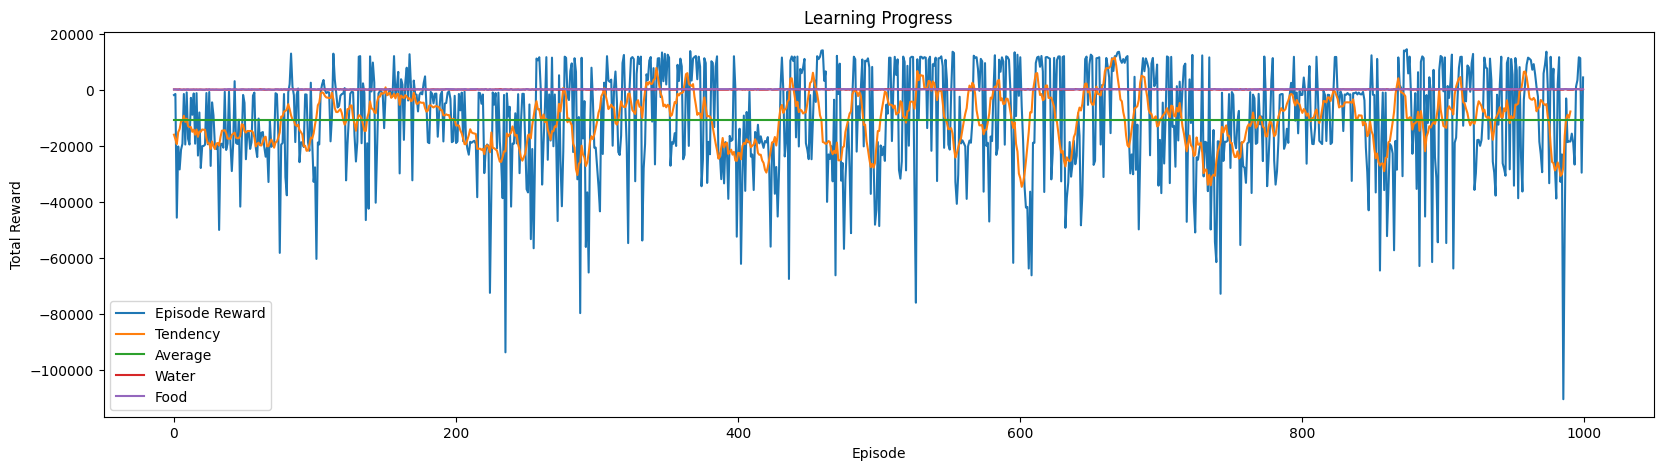

In [5]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.plot(episode_food_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water', 'Food'])
plt.show()


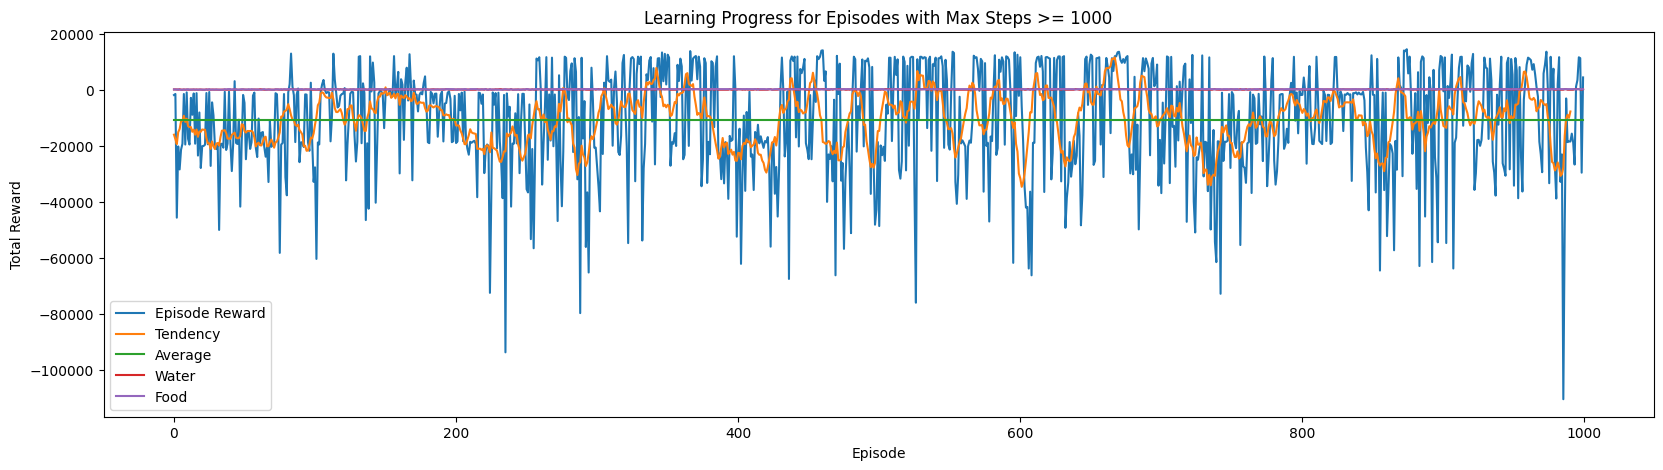

In [8]:
# Filter episodes with max steps >= 1000
filtered_episodes = [(r, w, f, s) for r, w, f, s in zip(episode_rewards, episode_water_resources, episode_food_resources, episode_max_steps) if s >= 1000]

# Unpack the filtered data
filtered_rewards, filtered_water_resources, filtered_food_resources, filtered_steps = zip(*filtered_episodes)

# Plot the total rewards for filtered episodes
plt.figure(figsize=(20, 5))
plt.plot(filtered_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress for Episodes with Max Steps >= 1000')
# Plot tendency curve
plt.plot(np.convolve(filtered_rewards, np.ones((10,))/10, mode='valid'))
# Plot average
plt.plot(np.ones(len(filtered_rewards)) * np.mean(filtered_rewards))
plt.plot(filtered_water_resources)
plt.plot(filtered_food_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water', 'Food'])
plt.show()


Save Complete


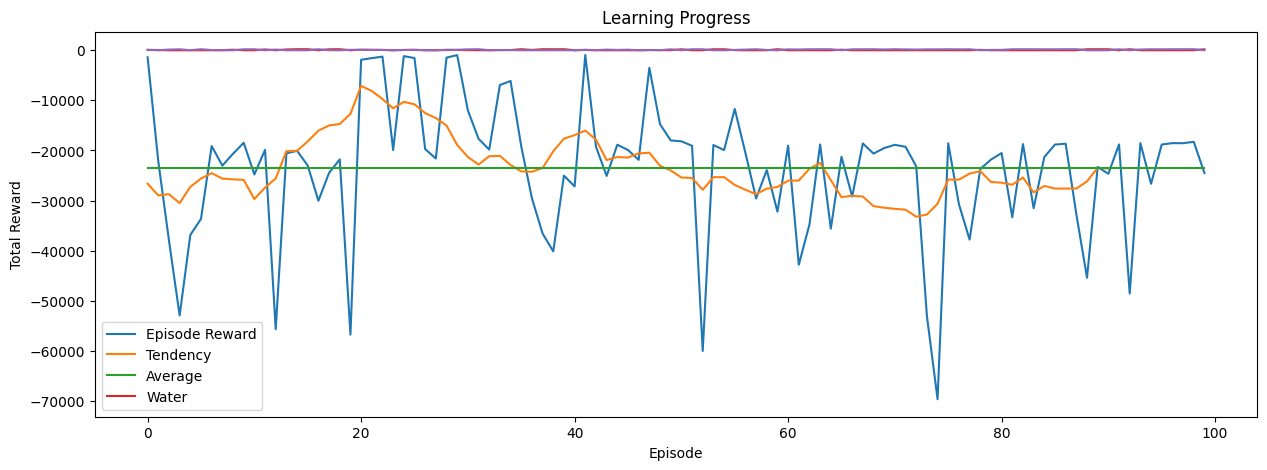

In [6]:
#Save results
save_results('FirstRunDangerMode', observation, agent.q_table, episode_rewards, episode_water_resources, episode_food_resources,
             learning_rate, discount_factor, exploration_prob, epsilon_decay, replay_buffer_size, batch_size)
